In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
mvpercentage = lambda x:x.isnull().sum()*100/len(df)
chk_null = lambda x:x.isnull().sum()


In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/cars_engage_2022.csv')

:First we have to look the overiew of the data set through the head function.

In [8]:
df.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever comes first),Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever comes first),Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/

from the above analysis there is an unnamed column that is unnecessary in our data frame. 

Remove the unnamed column



In [9]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

Now data looks like the below:

In [10]:
df.head()

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever comes first),Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever comes first),Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,N

EDA(**Exploratory Data Analysis).

First Check the Null value in our Data Frame and the percentage of missing values.

In [11]:
print(df.isnull().sum())

Make                                         75  
Model                                        0   
Variant                                      0   
Ex-Showroom_Price                            0   
Displacement                                 12  
Cylinders                                    66  
Valves_Per_Cylinder                          102 
Drivetrain                                   7   
Cylinder_Configuration                       13  
Emission_Norm                                11  
Engine_Location                              43  
Fuel_System                                  8   
Fuel_Tank_Capacity                           69  
Fuel_Type                                    0   
Height                                       1   
Length                                       0   
Width                                        12  
Body_Type                                    6   
Doors                                        4   
City_Mileage                                 555 


In [12]:
print(df.isnull().sum() * 100 / len(df))

Make                                         5.877743 
Model                                        0.000000 
Variant                                      0.000000 
Ex-Showroom_Price                            0.000000 
Displacement                                 0.940439 
Cylinders                                    5.172414 
Valves_Per_Cylinder                          7.993730 
Drivetrain                                   0.548589 
Cylinder_Configuration                       1.018809 
Emission_Norm                                0.862069 
Engine_Location                              3.369906 
Fuel_System                                  0.626959 
Fuel_Tank_Capacity                           5.407524 
Fuel_Type                                    0.000000 
Height                                       0.078370 
Length                                       0.000000 
Width                                        0.940439 
Body_Type                                    0.470219 
Doors     

In [13]:
columns =  [ col for col in df]

In [14]:
print(columns)

['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain', 'Cylinder_Configuration', 'Emission_Norm', 'Engine_Location', 'Fuel_System', 'Fuel_Tank_Capacity', 'Fuel_Type', 'Height', 'Length', 'Width', 'Body_Type', 'Doors', 'City_Mileage', 'Highway_Mileage', 'ARAI_Certified_Mileage', 'ARAI_Certified_Mileage_for_CNG', 'Kerb_Weight', 'Gears', 'Ground_Clearance', 'Front_Brakes', 'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension', 'Front_Track', 'Rear_Track', 'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Power_Steering', 'Power_Windows', 'Power_Seats', 'Keyless_Entry', 'Power', 'Torque', 'Odometer', 'Speedometer', 'Tachometer', 'Tripmeter', 'Seating_Capacity', 'Seats_Material', 'Type', 'Wheelbase', 'Wheels_Size', 'Start_/_Stop_Button', '12v_Power_Outlet', 'Audiosystem', 'Aux-in_Compatibility', 'Average_Fuel_Consumption', 'Basic_Warranty', 'Bluetooth', 'Boot-lid_Opener', 'Boot_Space', 'CD_/_MP3_/_DVD_Player', 'Central_Locking', 'Child_Safet

In [15]:
for val in df.columns:
  print(val)

Make
Model
Variant
Ex-Showroom_Price
Displacement
Cylinders
Valves_Per_Cylinder
Drivetrain
Cylinder_Configuration
Emission_Norm
Engine_Location
Fuel_System
Fuel_Tank_Capacity
Fuel_Type
Height
Length
Width
Body_Type
Doors
City_Mileage
Highway_Mileage
ARAI_Certified_Mileage
ARAI_Certified_Mileage_for_CNG
Kerb_Weight
Gears
Ground_Clearance
Front_Brakes
Rear_Brakes
Front_Suspension
Rear_Suspension
Front_Track
Rear_Track
Front_Tyre_&_Rim
Rear_Tyre_&_Rim
Power_Steering
Power_Windows
Power_Seats
Keyless_Entry
Power
Torque
Odometer
Speedometer
Tachometer
Tripmeter
Seating_Capacity
Seats_Material
Type
Wheelbase
Wheels_Size
Start_/_Stop_Button
12v_Power_Outlet
Audiosystem
Aux-in_Compatibility
Average_Fuel_Consumption
Basic_Warranty
Bluetooth
Boot-lid_Opener
Boot_Space
CD_/_MP3_/_DVD_Player
Central_Locking
Child_Safety_Locks
Clock
Cup_Holders
Distance_to_Empty
Door_Pockets
Engine_Malfunction_Light
Extended_Warranty
FM_Radio
Fuel-lid_Opener
Fuel_Gauge
Handbrake
Instrument_Console
Low_Fuel_Warning


WE make a function which will drop the column which are more than 70% null values.

In [16]:
def dropColumn():
  for val in df.columns:
    per = df[val].isnull().sum()*100/len(df[val])
    if(per >= 70):
      df.drop(val,axis=1,inplace=True)


In [17]:
dropColumn()

In [18]:
print(df.isnull().sum() * 100 / len(df))

Make                                         5.877743 
Model                                        0.000000 
Variant                                      0.000000 
Ex-Showroom_Price                            0.000000 
Displacement                                 0.940439 
Cylinders                                    5.172414 
Valves_Per_Cylinder                          7.993730 
Drivetrain                                   0.548589 
Cylinder_Configuration                       1.018809 
Emission_Norm                                0.862069 
Engine_Location                              3.369906 
Fuel_System                                  0.626959 
Fuel_Tank_Capacity                           5.407524 
Fuel_Type                                    0.000000 
Height                                       0.078370 
Length                                       0.000000 
Width                                        0.940439 
Body_Type                                    0.470219 
Doors     

from the above analysis, 
USB_Ports have 97% Missing  values
Heads-Up-Display has 96% Missing Values
The battery has 98% Missing values
Electric_Range has 98% Missing values
So we have to drop these features and impute other features missing values.

In [19]:
#find the corresponding value towards null value or missing value
df.loc[df['Make'].isnull() == True]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
252,NaN,Mercedes-Benz B-Class,B 180 Sport,"Rs. 29,88,311",1595 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,50 litres,Petrol,1557 mm,4393 mm,1786 mm,MPV,5.0,9.5 km/litre,14.2 km/litre,14.81 km/litre,1425 kg,7,190 mm,Ventilated Disc,Ventilated Disc,McPherson Strut,Four Link,1552 mm,1549 mm,205/55R16,205/55R16,Electric Power,All Windows,Yes,Smart Key,122PS@5000rpm,200Nm@1250-4000rpm,Digital,Analog,Analog,Yes,5.0,Leather,Automatic,2699 mm,205/55R16,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,3 years / Unlimited Kms,Yes,"Internal, With Remote",488 litres,Yes,Yes,Yes,Digital,Front & Rear,Yes,Front & Rear,Yes,4th year /with (absolutely no mileage restriction),Yes,"With Remote, Manual",Analog,Automatic,Analog + Digital,Yes,11 meter,Yes,Driver & Front Passenger,NaN,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,1950 kg,"Driver pelvic airbag, Driver frontal airbag, Front passenger frontal airbag, Front passenger side airbag, Driver knee airbag, Curtain airbags, Drive side airbag, Front passenger pelvic airbag",Yes,Yes,Yes,Yes,7.0,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes
253,NaN,Mercedes-Benz B-Class,B 200 Cdi Sport,"Rs. 30,89,851",2143 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,50 litres,Diesel,1557 mm,4393 mm,1786 mm,MPV,5.0,11.5 km/litre,15 km/litre,15 km/litre,1577 kg,7,190 mm,Ventilated Disc,Ventilated Disc,McPherson strut front axle,4 link rear axle,1522 mm,1549 mm,205/55R16,205/55R16,Electric Power,All Windows,Yes,Smart Key,136PS@4400RPM,300Nm@1600-3000rpm,Digital,Analog,Analog,Yes,5.0,Leather,Automatic,2699 mm,205/55R16,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,3 years / Unlimited Kms,NaN,"With Remote, Manual",488 litres,Yes,Yes,Yes,Digital,Front & Rear,Yes,Front & Rear,Yes,4th year /with (absolutely no mileage restriction),Yes,Internal,Analog,Automatic,Analog + Digital,Yes,11 meter,Yes,NaN,NaN,Fully automatic climate control,NaN,Yes,Yes,Y

### Impute the missing value in Make column


In [20]:
df.fillna(value = {'Make':'other'},inplace=True)

In [21]:
df.loc[df.Make=='other']

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
252,other,Mercedes-Benz B-Class,B 180 Sport,"Rs. 29,88,311",1595 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,50 litres,Petrol,1557 mm,4393 mm,1786 mm,MPV,5.0,9.5 km/litre,14.2 km/litre,14.81 km/litre,1425 kg,7,190 mm,Ventilated Disc,Ventilated Disc,McPherson Strut,Four Link,1552 mm,1549 mm,205/55R16,205/55R16,Electric Power,All Windows,Yes,Smart Key,122PS@5000rpm,200Nm@1250-4000rpm,Digital,Analog,Analog,Yes,5.0,Leather,Automatic,2699 mm,205/55R16,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,3 years / Unlimited Kms,Yes,"Internal, With Remote",488 litres,Yes,Yes,Yes,Digital,Front & Rear,Yes,Front & Rear,Yes,4th year /with (absolutely no mileage restriction),Yes,"With Remote, Manual",Analog,Automatic,Analog + Digital,Yes,11 meter,Yes,Driver & Front Passenger,NaN,Fully automatic climate control,NaN,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,1950 kg,"Driver pelvic airbag, Driver frontal airbag, Front passenger frontal airbag, Front passenger side airbag, Driver knee airbag, Curtain airbags, Drive side airbag, Front passenger pelvic airbag",Yes,Yes,Yes,Yes,7.0,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Electric Adjustment with Memory,Yes,Yes,Cup Holders,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes
253,other,Mercedes-Benz B-Class,B 200 Cdi Sport,"Rs. 30,89,851",2143 cc,4.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,50 litres,Diesel,1557 mm,4393 mm,1786 mm,MPV,5.0,11.5 km/litre,15 km/litre,15 km/litre,1577 kg,7,190 mm,Ventilated Disc,Ventilated Disc,McPherson strut front axle,4 link rear axle,1522 mm,1549 mm,205/55R16,205/55R16,Electric Power,All Windows,Yes,Smart Key,136PS@4400RPM,300Nm@1600-3000rpm,Digital,Analog,Analog,Yes,5.0,Leather,Automatic,2699 mm,205/55R16,Yes,Yes,CD/MP3/DVD Player with USB & Aux-in,Yes,Yes,3 years / Unlimited Kms,NaN,"With Remote, Manual",488 litres,Yes,Yes,Yes,Digital,Front & Rear,Yes,Front & Rear,Yes,4th year /with (absolutely no mileage restriction),Yes,Internal,Analog,Automatic,Analog + Digital,Yes,11 meter,Yes,NaN,NaN,Fully automatic climate control,NaN,Yes,Y

From the above code we can see that the missing value is fill with other value.

In [22]:
chk_null(df['Make'])

0

Now we can see that the missing value of Make column (feature) is imputed.

### Impute the missing value in Displacement


In [23]:
df.loc[df['Displacement'].isnull() == True]

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control
615,Mahindra,E2O Plus,P4,"Rs. 8,81,425",NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,NaN,Electric,1585 mm,3390 mm,1575 mm,Hatchback,4.0,80 km/litre,NaN,NaN,937 kg,NaN,170 mm,Ventilated Disc,Drum,Mac Pherson Strut type independent suspension with coaxial spring.,Twin Pivot Trailing Arm with Coaxial spring Damper,NaN,NaN,165/60/R14,165/60/R14,Electric Power,All Windows,NaN,Remote,25.8PS@3500rpm,70Nm@1000rpm,Analog,Digital,Digital,NaN,4.0,Vinyl,Automatic,2258 mm,R14,NaN,NaN,CD/MP3/DVD Player with USB & Aux-in,Yes,NaN,3 years 60000 kms,NaN,With Remote,135 litres,Yes,NaN,Yes,Digital,Front,Yes,Front,NaN,NaN,NaN,Internal,NaN,Automatic,Analog,Yes,4.35 meter,NaN,Driver Only,Not Applicable,Manual Air conditioning with cooling and heating,NaN,Yes,NaN,Yes,Yes,NaN,Yes,All Rows,1257 kg,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Rear sensors,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Manual Adjustment,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
616,Mahindra,E2O Plus,P6,"Rs. 9,57,177",NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,NaN,Electric,1585 mm,3390 mm,1575 mm,Hatchback,4.0,80 km/litre,NaN,NaN,937 kg,NaN,170 mm,Ventilated Disc,Drum,Mac Pherson Strut type independent suspension with coaxial spring.,Twin Pivot Trailing Arm with Coaxial spring Damper,NaN,NaN,165/60/R14,165/60/R14,Electric Power,All Windows,NaN,Remote,25.8PS@3500rpm,70Nm@1000rpm,Analog,Digital,Digital,NaN,4.0,Fabric,Automatic,2258 mm,R14,NaN,NaN,CD/MP3/DVD Player with USB & Aux-in,Yes,NaN,3 years 60000 kms,Yes,With Remote,135 litres,Yes,NaN,Yes,Digital,Not on offer,Yes,Front,NaN,NaN,Yes,Internal,NaN,Automatic,Analog,Yes,4.35 meter,NaN,Driver Only,Not Applicable,Manual Air conditioning with cooling and heating,NaN,Yes,NaN,Yes,Yes,NaN,Yes,All Rows,1257 kg,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Rear sensors with camera,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Manual Adjustment,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
617,Tata,Tigor Ev,Xm+,"Rs. 9,60,868",NaN,NaN,NaN,FWD (Front Wheel Drive),NaN,BS VI,NaN,Injection,35 litres,Electric,1537 mm,3992 mm,1677 mm,Sedan,5.0,NaN,NaN,NaN,NaN,NaN,165 mm,Ventilated Disc,Drum,"Ind

In [24]:
chk_null(df['Displacement'])


12

As we can see Displacement has alphanumeric values and it's an object dtype, so we have to split this column and separate the numeric value from the column

In [25]:
df[['Disp','Other']]= df["Displacement"].str.split(" ",expand=True)
df.drop(['Displacement','Other'],axis=1,inplace=True)
print(df.shape)

(1276, 115)


Now we have a new column Disp which has the numeric value of displacement.

In [26]:
df['Disp'].dtype

dtype('O')

Because the Disp feature is object type we have to change it to int
To change it to int first we have to fill na value to 0.

In [27]:
df.fillna(value = {'Disp': 0},inplace=True)

Now we can the datatype of Disp column.

In [28]:
df.Disp = df.Disp.astype('int')

In [29]:
df.iloc[df.Disp==0] = np.mean(df.Disp)

From the above code we replace the 0 value the mean of Disp column.

Immpute the missin values of City Milege Features

In [30]:
mvpercentage(df['City_Mileage'])

42.711598746081506

In [31]:
df.fillna(value = {'City_Mileage': 0},inplace=True)

In [32]:
chk_null(df['City_Mileage'])

0

Immpute the missing value of Highway_Mileage

In [33]:
mvpercentage(df['Highway_Mileage'])

61.755485893416925

In [34]:
df[['Highway_Mil','Other']]= df["Highway_Mileage"].str.split(" ",expand=True)
df.drop(['Highway_Mileage','Other'],axis=1,inplace=True)

In [35]:
df['Highway_Mil']

0       NaN    
1       NaN    
2       NaN    
3       NaN    
4       NaN    
5       NaN    
6       24     
7       24     
8       24     
9       24     
10      NaN    
11      NaN    
12      NaN    
13      NaN    
14      NaN    
15      NaN    
16      NaN    
17      NaN    
18      NaN    
19      NaN    
20      NaN    
21      NaN    
22      NaN    
23      NaN    
24      15     
25      15     
26      15     
27      NaN    
28      NaN    
29      17     
30      17     
31      24.07  
32      17     
33      NaN    
34      17     
35      NaN    
36      NaN    
37      NaN    
38      NaN    
39      NaN    
40      NaN    
41      NaN    
42      NaN    
43      NaN    
44      NaN    
45      NaN    
46      NaN    
47      NaN    
48      NaN    
49      NaN    
50      NaN    
51      NaN    
52      NaN    
53      NaN    
54      NaN    
55      23     
56      23     
57      23     
58      23     
59      24     
60      24     
61      24     
62      

In [36]:
df['Highway_Mil'].dtypes

dtype('O')

In [37]:
df.fillna(value = {'Highway_Mil':0},inplace=True)

In [38]:
chk_null(df['Highway_Mil'])

0

In [39]:
df = df.apply(lambda x:x.fillna(x.mean())
              if x.dtype=='float'
              else x.fillna(x.value_counts().index[0]))

In [40]:
df.isnull().sum()

Make                                         0
Model                                        0
Variant                                      0
Ex-Showroom_Price                            0
Cylinders                                    0
Valves_Per_Cylinder                          0
Drivetrain                                   0
Cylinder_Configuration                       0
Emission_Norm                                0
Engine_Location                              0
Fuel_System                                  0
Fuel_Tank_Capacity                           0
Fuel_Type                                    0
Height                                       0
Length                                       0
Width                                        0
Body_Type                                    0
Doors                                        0
City_Mileage                                 0
ARAI_Certified_Mileage                       0
Kerb_Weight                                  0
Gears        

###Data Prepration

In [41]:
df['Ex-Showroom_Price']

0       Rs. 2,92,667    
1       Rs. 2,36,447    
2       Rs. 2,96,661    
3       Rs. 3,34,768    
4       Rs. 2,72,223    
5       Rs. 3,14,815    
6       Rs. 2,79,650    
7       Rs. 3,51,832    
8       Rs. 3,33,419    
9       Rs. 3,62,000    
10      Rs. 3,90,000    
11      Rs. 4,37,065    
12      Rs. 3,53,290    
13      Rs. 2,83,290    
14      Rs. 3,83,290    
15      Rs. 4,13,290    
16      Rs. 4,33,290    
17      Rs. 4,54,490    
18      Rs. 4,63,290    
19      Rs. 4,84,490    
20      Rs. 4,40,990    
21      Rs. 4,70,990    
22      Rs. 4,62,190    
23      Rs. 4,92,190    
24      Rs. 3,52,136    
25      Rs. 3,80,573    
26      Rs. 3,92,967    
27      Rs. 4,66,057    
28      Rs. 4,25,255    
29      Rs. 3,77,588    
30      Rs. 3,94,036    
31      Rs. 3,60,843    
32      Rs. 4,07,238    
33      Rs. 4,39,777    
34      Rs. 4,38,559    
35      Rs. 3,74,990    
36      Rs. 4,68,229    
37      Rs. 5,02,492    
38      Rs. 4,99,990    
39      Rs. 4,69,990    


As we can see that Ex showroom price have alphanumeric and object type. 

In [42]:
df[['Ex','Price']]= df["Ex-Showroom_Price"].str.split(" ",expand=True)
df.drop(['Ex-Showroom_Price','Ex'],axis=1,inplace=True)


In [43]:
df['Price']

0       2,92,667    
1       2,36,447    
2       2,96,661    
3       3,34,768    
4       2,72,223    
5       3,14,815    
6       2,79,650    
7       3,51,832    
8       3,33,419    
9       3,62,000    
10      3,90,000    
11      4,37,065    
12      3,53,290    
13      2,83,290    
14      3,83,290    
15      4,13,290    
16      4,33,290    
17      4,54,490    
18      4,63,290    
19      4,84,490    
20      4,40,990    
21      4,70,990    
22      4,62,190    
23      4,92,190    
24      3,52,136    
25      3,80,573    
26      3,92,967    
27      4,66,057    
28      4,25,255    
29      3,77,588    
30      3,94,036    
31      3,60,843    
32      4,07,238    
33      4,39,777    
34      4,38,559    
35      3,74,990    
36      4,68,229    
37      5,02,492    
38      4,99,990    
39      4,69,990    
40      5,28,464    
41      5,53,015    
42      5,94,464    
43      6,18,015    
44      4,22,444    
45      4,80,670    
46      4,29,990    
47      5,03,

Again we can see that there is comma in price feature so we have to replace the commas.

In [44]:
df['Price'] = df['Price'].str.replace(',', '')

In [45]:
df['Price']

0       292667   
1       236447   
2       296661   
3       334768   
4       272223   
5       314815   
6       279650   
7       351832   
8       333419   
9       362000   
10      390000   
11      437065   
12      353290   
13      283290   
14      383290   
15      413290   
16      433290   
17      454490   
18      463290   
19      484490   
20      440990   
21      470990   
22      462190   
23      492190   
24      352136   
25      380573   
26      392967   
27      466057   
28      425255   
29      377588   
30      394036   
31      360843   
32      407238   
33      439777   
34      438559   
35      374990   
36      468229   
37      502492   
38      499990   
39      469990   
40      528464   
41      553015   
42      594464   
43      618015   
44      422444   
45      480670   
46      429990   
47      503990   
48      547990   
49      530990   
50      512990   
51      578990   
52      570990   
53      556490   
54      460000   
55      52

In [46]:
df.dtypes

Make                                         object 
Model                                        object 
Variant                                      object 
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                   object 
Cylinder_Configuration                       object 
Emission_Norm                                object 
Engine_Location                              object 
Fuel_System                                  object 
Fuel_Tank_Capacity                           object 
Fuel_Type                                    object 
Height                                       object 
Length                                       object 
Width                                        object 
Body_Type                                    object 
Doors                                        float64
City_Mileage                                 object 
ARAI_Certified_Mileage                       o

In [47]:
df.Price = df.Price.astype('float')

Now Price column has changed to float

In [48]:
df.head()

,Make,Model,Variant,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control,Disp,Highway_Mil,Price
0,Tata,Nano Genx,Xt,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,23.6 km/litre,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,Yes,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever comes first),Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever comes first),Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,Yes,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,2510 kg,"Driver frontal airbag, Front passenger frontal airbag",Yes,Yes,Yes,Yes,23.066332,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,624.0,0,292667.0
1,Tata,Nano Genx,Xe,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,23.6 km/litre,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,All Windows,Yes,Smart Key,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,Not on offer,Yes,Yes,2 years /75000 Kms (years/distance whichever comes first),Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever comes first),Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,Ye

Now we are going to check the correlation between these features.

In [49]:
cor = df.corr()
cor

,Cylinders,Valves_Per_Cylinder,Doors,Seating_Capacity,Number_of_Airbags,Disp,Price
Cylinders,1.000000,0.999701,0.999706,0.999687,0.999139,0.005217,0.303337
Valves_Per_Cylinder,0.999701,1.000000,0.999625,0.999607,0.998928,-0.003267,-0.029262
Doors,0.999706,0.999625,1.000000,0.999977,0.999330,-0.003394,-0.262466
Seating_Capacity,0.999687,0.999607,0.999977,1.000000,0.999359,-0.002240,-0.188312
Number_of_Airbags,0.999139,0.998928,0.999330,0.999359,1.000000,0.003069,0.063238
Disp,0.005217,-0.003267,-0.003394,-0.002240,0.003069,1.000000,0.794293
Price,0.303337,-0.029262,-0.262466,-0.188312,0.063238,0.794293,1.000000


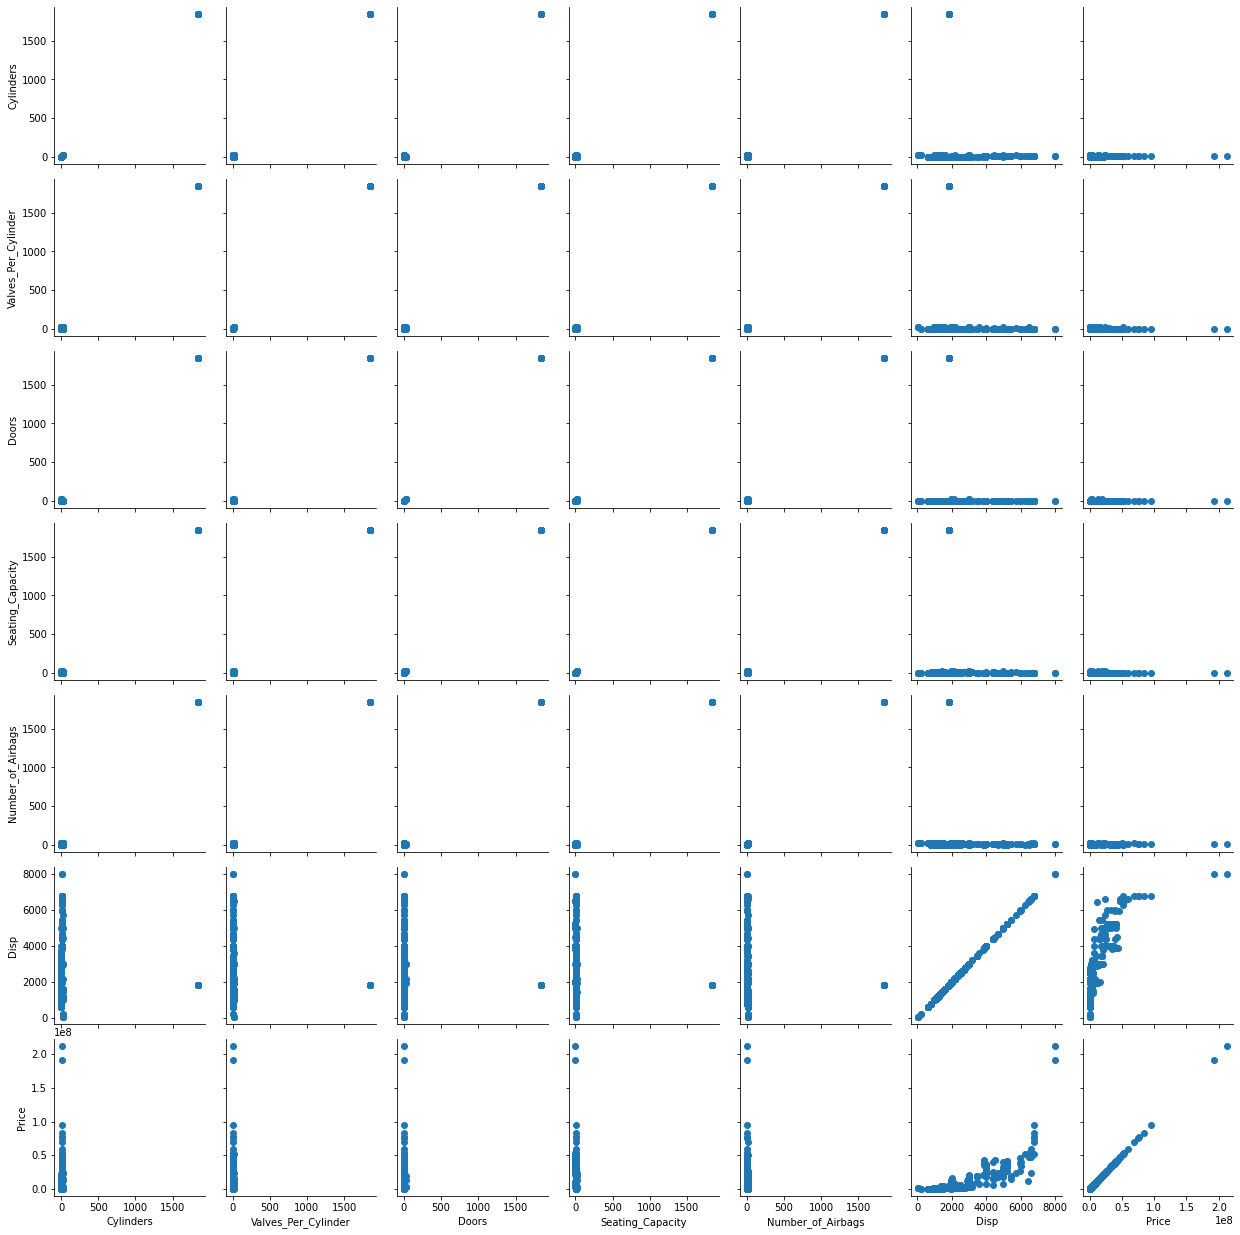

In [50]:
fdata1=sns.PairGrid(df)
fdata1.map(plt.scatter)

In [51]:
pd.crosstab(df.Cylinders,df.Valves_Per_Cylinder)

Valves_Per_Cylinder,1.000000,2.000000,3.000000,4.000000,8.000000,12.000000,16.000000,22.582181,1841.323668
Cylinders,,,,,,,,,
2.000000,0,6,0,0,0,0,0,0,0
3.000000,0,2,0,207,0,4,0,0,0
4.000000,0,34,2,708,1,0,2,42,0
5.000000,0,0,0,10,0,0,0,0,0
6.000000,0,0,0,104,0,0,0,2,0
8.000000,0,4,0,44,1,0,0,3,0
10.000000,0,0,0,10,0,0,0,0,0
12.000000,0,0,0,20,0,0,0,1,0
16.000000,0,0,0,2,0,0,0,0,0


Grouping the different product

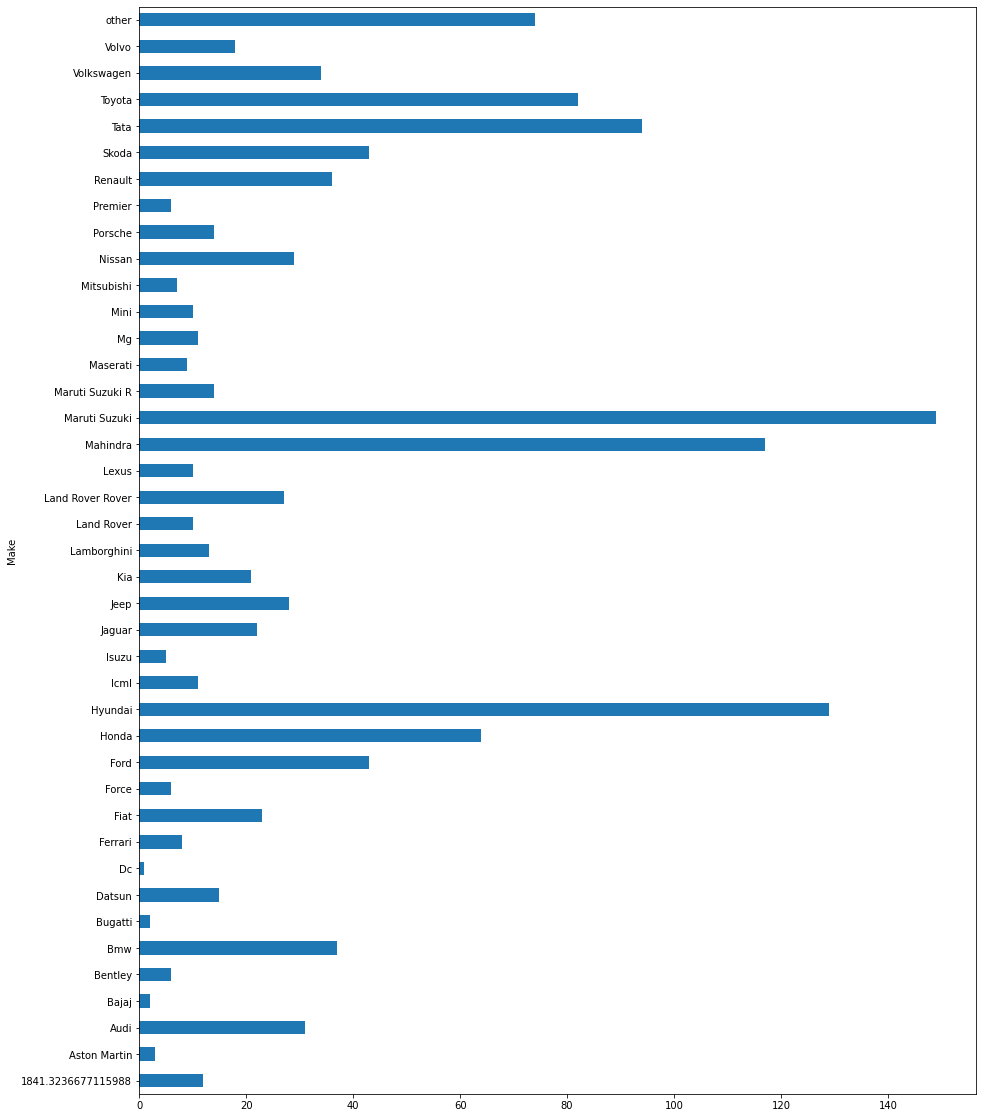

In [52]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(20)
df.groupby(['Make']).size().plot(kind = "barh")

In [53]:
eng_size = df.groupby(['Cylinders']).size()

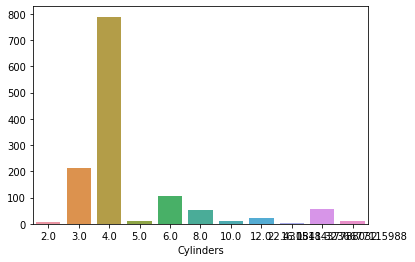

In [54]:
sns.barplot(x = eng_size.index, y = eng_size.values)

In [55]:
eng = df.groupby(['Cylinders'])

In [56]:
eng.get_group(2.0)['Make']

0    Tata
1    Tata
2    Tata
3    Tata
4    Tata
5    Tata
Name: Make, dtype: object

In [57]:
eng.get_group(2.0)['Make']

0    Tata
1    Tata
2    Tata
3    Tata
4    Tata
5    Tata
Name: Make, dtype: object

In [58]:
eng.get_group(4.0)['Make']

24      Maruti Suzuki   
25      Maruti Suzuki   
26      Maruti Suzuki   
27      Maruti Suzuki   
28      Maruti Suzuki   
46      Hyundai         
47      Hyundai         
48      Hyundai         
49      Hyundai         
50      Hyundai         
51      Hyundai         
52      Hyundai         
53      Hyundai         
70      Maruti Suzuki   
71      Maruti Suzuki   
72      Maruti Suzuki   
73      Maruti Suzuki   
74      Maruti Suzuki   
75      Maruti Suzuki   
76      Maruti Suzuki   
81      Premier         
82      Premier         
83      Premier         
84      Premier         
85      Premier         
86      Premier         
87      Toyota          
88      Toyota          
89      Toyota          
90      Toyota          
91      Toyota          
92      Toyota          
93      Toyota          
94      Toyota          
95      Toyota          
96      Toyota          
97      Toyota          
98      Toyota          
99      Toyota          
100     Toyota          


In [59]:
eng.get_group(5.0)['Make']

269     Volvo
270     Volvo
271     Volvo
759     Volvo
760     Volvo
768     Ford 
780     Volvo
784     Volvo
801     Volvo
1027    Volvo
Name: Make, dtype: object

In [60]:
eng.get_group(8.0)['Make']

298     Ford            
301     Jeep            
308     other           
309     other           
310     other           
314     Audi            
324     other           
328     other           
330     Audi            
331     Maserati        
335     other           
336     Porsche         
337     Porsche         
338     Porsche         
340     other           
342     Lamborghini     
344     Ferrari         
348     Ferrari         
352     Bentley         
796     other           
827     Land Rover Rover
828     Land Rover Rover
829     Land Rover Rover
831     Land Rover Rover
833     Land Rover Rover
836     Land Rover Rover
846     Toyota          
847     Audi            
848     Land Rover Rover
849     Land Rover Rover
851     Land Rover Rover
854     Land Rover Rover
855     Land Rover Rover
856     Land Rover Rover
858     Maserati        
859     other           
860     other           
861     other           
872     Ferrari         
873     Ferrari         


In [61]:
eng.get_group(10.0)['Make']

341    Audi       
863    Lamborghini
864    Lamborghini
865    Lamborghini
866    Lamborghini
867    Lamborghini
868    Lamborghini
869    Lamborghini
870    Lamborghini
871    Lamborghini
Name: Make, dtype: object

In [62]:
eng.get_group(16.0)['Make']

355    Bugatti
356    Bugatti
Name: Make, dtype: object

In [63]:
make  = df.groupby('Make')

In [64]:
make.get_group('Maruti Suzuki')

,Make,Model,Variant,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control,Disp,Highway_Mil,Price
24,Maruti Suzuki,Eeco,5 Str,4.0,4.0,RWD (Rear Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,40 litres,Petrol,1800 mm,3675 mm,1475 mm,MPV,5.0,12 km/litre,15 km/litre,920 kg,5,160 mm,Ventilated Disc,Drum,McPherson struts,3 Link Rigid,1280 mm,1290 mm,155 R13 LT,155 R13 LT,Electric Power,All Windows,Yes,Smart Key,73PS@6000rpm,101Nm@3000rpm,Digital,Analog,Not on offer,Yes,5.0,Fabric,Manual,2350 mm,155 R13 LT,Yes,Yes,Not on offer,Yes,Yes,2 years /40000 Kms (years/distance whichever comes first),Yes,Internal,400 litres,Yes,Yes,Yes,Digital,Not on offer,Yes,Front & Rear,Yes,"3rd/4th year/up to 80,000 Kms (whichever comes first)",Yes,Manual,Digital,Manual,Analog + Digital,Yes,4.5 meter,Yes,Driver & Front Passenger,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,1510 kg,Driver frontal airbag,Yes,Yes,Yes,Yes,1.000000,Rake,Rear sensors,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1196.0,15,352136.0
25,Maruti Suzuki,Eeco,7 Str,4.0,4.0,FWD (Front Wheel Drive),In-line,BS 6,"Front, Longitudinal",Injection,40 litres,Petrol,1800 mm,3675 mm,1475 mm,MPV,5.0,12 km/litre,15 km/litre,940 kg,5,160 mm,Ventilated Disc,Drum,McPherson struts,3 Link Rigid,1280 mm,1290 mm,155 R13 LT,155 R13 LT,Electric Power,All Windows,Yes,Smart Key,74PS@6000RPM,101Nm@3000rpm,Digital,Analog,Not on offer,Yes,7.0,Fabric,Manual,2350 mm,155 R13 LT,Yes,Yes,Not on offer,Yes,Yes,2 years /40000 Kms (years/distance whichever comes first),Yes,Internal,250 litres,Yes,Yes,Yes,Digital,Not on offer,Yes,Front & Rear,Yes,"3rd/4th year/up to 80,000 Kms (whichever comes first)",Yes,Internal,Digital,Manual,Analog + Digital,Yes,4.5 meter,Yes,Driver & Front Passenger,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,1540 kg,Driver frontal airbag,Yes,Yes,Yes,Yes,1.000000,Rake,Rear sensors,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,1196.0,15,380573.0
26,Maruti Suzuki,Eeco,5 Str With Ac+Htr,4.0,4.0,RWD (Rear Wheel D

In [65]:
make.get_group('Aston Martin').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Cylinders              1.066667e+01
Valves_Per_Cylinder    4.000000e+00
Doors                  2.666667e+00
Gears                  1.960000e+02
Seating_Capacity       2.666667e+00
Number_of_Airbags      7.333333e+00
Disp                   5.038333e+03
Price                  3.626744e+07
dtype: float64

In [66]:
# 'Land Rover Rover'
make.get_group('Land Rover Rover').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Cylinders              6.370370e+00
Valves_Per_Cylinder    5.768390e+00
Doors                  4.962963e+00
Gears                  3.703704e+25
Seating_Capacity       5.814815e+00
Number_of_Airbags      8.150605e+00
Disp                   3.199704e+03
Price                  1.645647e+07
dtype: float64

In [67]:
make.get_group('Aston Martin')['Model']

347     Db 11  
1056    Vantage
1057    Rapide 
Name: Model, dtype: object

In [68]:
make.get_group('Land Rover Rover')['Model'].unique()

array(['Range Evoque', 'Range Evoque Convertible', 'Range Velar',
       'Range Sport', 'Range'], dtype=object)

In [69]:
df.head()

,Make,Model,Variant,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,ARAI_Certified_Mileage,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,Engine_Immobilizer,Seat_Back_Pockets,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Leather_Wrapped_Steering,Automatic_Headlamps,ASR_/_Traction_Control,Cruise_Control,Disp,Highway_Mil,Price
0,Tata,Nano Genx,Xt,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,23.6 km/litre,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,Yes,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever comes first),Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever comes first),Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,Yes,Yes,Yes,Yes,Yes,Yes,Yes,All Rows,2510 kg,"Driver frontal airbag, Front passenger frontal airbag",Yes,Yes,Yes,Yes,23.066332,"Rake, Reach",Rear sensors with camera,Yes,Yes,Yes,Touch Sensitive,Multifunction Steering Wheel,Yes,Yes,Manual Adjustment,Yes,Yes,Cup Holders,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,624.0,0,292667.0
1,Tata,Nano Genx,Xe,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,23.6 km/litre,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut with gas filled dampers and anti-roll bar","Independent, Semi Trailing arm with coil spring & gas filled shock absorbers",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,All Windows,Yes,Smart Key,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,Not on offer,Yes,Yes,2 years /75000 Kms (years/distance whichever comes first),Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever comes first),Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Fully automatic climate control,Yes,Yes,Yes,Yes,Yes,Yes,Ye

In [70]:
df1 = df.loc[:,['Cylinders','Price']]

In [71]:
df1

,Cylinders,Price
0,2.000000,292667.0
1,2.000000,236447.0
2,2.000000,296661.0
3,2.000000,334768.0
4,2.000000,272223.0
5,2.000000,314815.0
6,3.000000,279650.0
7,3.000000,351832.0
8,3.000000,333419.0
9,3.000000,362000.0


In [72]:
df1['Price'].max()

212155397.0

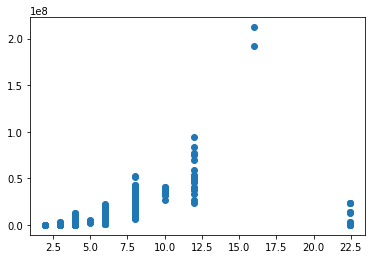

In [73]:
plt.scatter(df1['Cylinders'],df['Price'],cmap='BuPu')

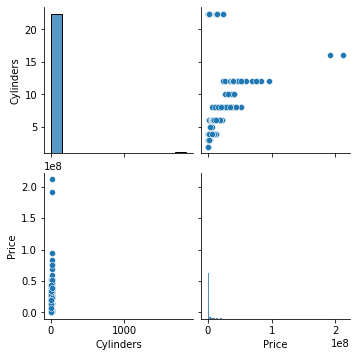

In [74]:
sns.pairplot(df1)

In [75]:
df1.describe()

,Cylinders,Price
count,1276.000000,1.264000e+03
mean,22.431518,4.608345e+06
std,177.339367,1.218881e+07
min,2.000000,2.364470e+05
25%,4.000000,7.390555e+05
50%,4.000000,1.059871e+06
75%,4.000000,2.990700e+06
max,1841.323668,2.121554e+08


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


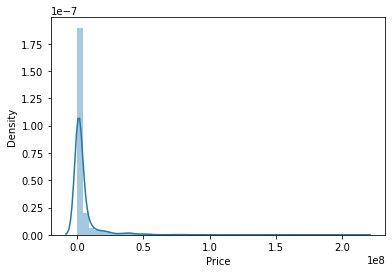

In [76]:
sns.distplot(df['Price'])

In [77]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Cylinders    0.0      
Price        2251644.5
dtype: float64


In [78]:
print(df1['Price'].skew())
df1['Price'].describe()

8.772521671706436


count    1.264000e+03
mean     4.608345e+06
std      1.218881e+07
min      2.364470e+05
25%      7.390555e+05
50%      1.059871e+06
75%      2.990700e+06
max      2.121554e+08
Name: Price, dtype: float64

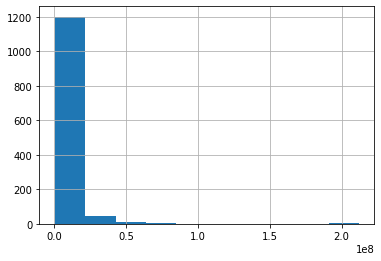

In [79]:
df.Price.hist()

In [80]:
print(df1['Price'].quantile(0.10))
print(df1['Price'].quantile(0.90))

548646.5
10187341.900000002


In [81]:
df1["Price"] = np.where(df["Price"] <548646.5, 548646.5,df['Price'])
df1["Price"] = np.where(df["Price"] >10187341.900000002, 10187341.900000002,df['Price'])
print(df1['Price'].skew())

1.5818662391312297


In [82]:
index = df[(df['Cylinders'] >= 10)|(df['Cylinders'] <= 2)].index
df.drop(index, inplace=True)
df['Cylinders'].describe()

count    1170.000000
mean     4.185470   
std      1.109394   
min      3.000000   
25%      4.000000   
50%      4.000000   
75%      4.000000   
max      8.000000   
Name: Cylinders, dtype: float64

In [83]:
df_out = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(760, 2)


In [84]:
df1["Price"] = df["Price"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df1['Price'].skew())
print(df1['Price'].skew())

1.1065379760053164
1.1065379760053164


In [85]:
print(df1['Price'].quantile(0.50)) 
print(df1['Price'].quantile(0.95)) 
df1['Price'] = np.where(df1['Price'] > 325, 140, df1['Price'])
df1.describe()

13.846957867108191
16.516107926048115


,Cylinders,Price
count,1276.000000,1170.000000
mean,22.431518,14.239354
std,177.339367,1.064578
min,2.000000,12.541294
25%,4.000000,13.504364
50%,4.000000,13.846958
75%,4.000000,14.851227
max,1841.323668,17.777681


In [86]:
df1['Price'] = df1['Price'].fillna(df1['Price'].mean())
df1['Cylinders'] = df1['Cylinders'].fillna(df1['Cylinders'].mean())

In [87]:
df1.isnull().sum()

Cylinders    0
Price        0
dtype: int64

In [88]:
x = df[['Cylinders']]
y = df[['Price']]

In [89]:
df1['Price'].isnull().sum()

0

In [90]:
class LinRegPredict:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def slr_model(self):
        #first import the important libraries
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.model_selection import train_test_split
        import matplotlib.pyplot as plt
        from sklearn.linear_model import LinearRegression
        import statsmodels.api as sm
        import plotly.express as px
        from sklearn import metrics
    
        #second split the data in training and testing
        X_train,X_test,y_train,y_test = train_test_split(self.x,self.y,test_size=0.4,random_state=0)
        print(f"{X_train.describe()}")
        reg = LinearRegression(normalize=True)
        print("################### Linear Regression Prediction ###################")
    
        #Third fit the model with linear regression
        reg.fit(X_train,y_train)
        y_pred = reg.predict(X_test)
        y_train_pred = reg.predict(X_train)
        print(y_pred,end=' ')
        print("################### OLS Regression Prediction ###################")
        X_Train_sm = sm.add_constant(X_train)
        lr = sm.OLS(y_train,X_Train_sm).fit()
        print(lr.summary())
        # print(lr.coef())
        # plt.scatter(X_train,y_train)
        # plt.plot(X_train,1849.4100+(-0.4361)*X_train,'r')
        plt.scatter(X_train, y_train, color = 'red')
        plt.plot(X_test,y_pred, color = 'blue')
        plt.show()
    def ypred(self,x):
       import numpy as np
       import pandas as pd
       from sklearn.model_selection import train_test_split
       from sklearn.linear_model import LinearRegression
       from sklearn import metrics
       from sklearn.model_selection import cross_val_score
        #second split the data in training and testin
       X_train,X_test,y_train,y_test = train_test_split(self.x,self.y,test_size=0.4,random_state=0)
       reg = LinearRegression(normalize=True)
       print("################### Prediction ###################")
        #Third fit the model
       lin_reg = LinearRegression(normalize=True)
       lin_reg.fit(X_train,y_train)
       y1_pred =lin_reg.predict([[x]])
       return y1_pred
    

In [91]:
obj = LinRegPredict(x,y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


        Cylinders
count  702.000000
mean   4.173789  
std    1.096485  
min    3.000000  
25%    4.000000  
50%    4.000000  
75%    4.000000  
max    8.000000  
################### Linear Regression Prediction ###################
[[ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [-1577002.48305061]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [10499912.79159088]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [-1577002.48305061]
 [-1577002.48305061]
 [ 2448635.94182989]
 [-1577002.48305061]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [-1577002.48305061]
 [ 2448635.94182989]
 [ 6474274.36671039]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [18551189.64135189]
 [ 2448635.94182989]
 [10499912.79159088]
 [ 2448635.94182989]
 [ 2448635.94182989]
 [18551189.64135189]
 [-1577002.48

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


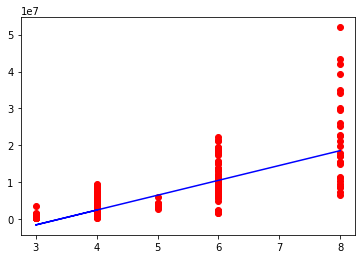

In [92]:
obj.slr_model()

In [93]:
class PolyRegPredict:
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def plr_model(self):
        #first import the important libraries
        from sklearn.preprocessing import PolynomialFeatures
        from sklearn.model_selection import train_test_split
        import matplotlib.pyplot as plt
        from sklearn import metrics
        from sklearn.linear_model import LinearRegression
        import statsmodels.api as sm
        import plotly.express as px
        from sklearn import metrics
    
        #second split the data in training and testing
        X_train,X_test,y_train,y_test = train_test_split(self.x,self.y,test_size=0.4,random_state=0)
        print(f"{X_train.describe()}")
        reg = LinearRegression(normalize=True)
        print("################### Polynomial Regression Prediction ###################")
    
        #Third fit the model with linear regression
        poly_reg = PolynomialFeatures(degree = 5)
        X_poly = poly_reg.fit_transform(X_train)
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, y_train)
        y_pred = lin_reg_2.predict(X_poly)
        print(y_pred)
        print("################### Score ###################")
        mae = metrics.mean_absolute_error(X_train, y_pred)
        mse = metrics.mean_squared_error(X_train, y_pred)
        rmse = np.sqrt(metrics.mean_squared_error(X_train,y_pred))
        r2_square = metrics.r2_score(y_train, y_pred)
        print("################### MAE MSE RMSE ###################")
        print(f"MAE = {mae}, MSE = {mse}, RMSE = {rmse}, R2 = {r2_square}")
        print("################Visualising the Polynomial Regression results##############")
        plt.scatter(X_train, y_train, color = 'red')
        plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
    def ypred(x):
        X_train,X_test,y_train,y_test = train_test_split(self.x,self.y,test_size=0.4,random_state=0)
        print(f"{X_train.describe()}")
        reg = LinearRegression(normalize=True)
        print("################### Polynomial Regression Prediction ###################")
    
        #Third fit the model with linear regression
        poly_reg = PolynomialFeatures(degree = 5)
        X_poly = poly_reg.fit_transform(X_train)
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, y_train)
        y_pred = lin_reg_2.predict(X_poly)
        print(y_pred)

        Cylinders
count  702.000000
mean   4.173789  
std    1.096485  
min    3.000000  
25%    4.000000  
50%    4.000000  
75%    4.000000  
max    8.000000  
################### Polynomial Regression Prediction ###################
[[10267924.46153815]
 [ 1710732.68803377]
 [10267924.46153815]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [10267924.46153815]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [  650643.66666828]
 [  650643.66666828]
 [  650643.66666828]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [21514857.48276027]
 [ 1710732.68803377]
 [  650643.66666828]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [21514857.48276027]
 [10267924.46153815]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [  650643.66666828]
 [ 1710732.68803377]
 [  650643.66666828]
 [ 1710732.68803377]
 [ 1710732.68803377]
 [1026792

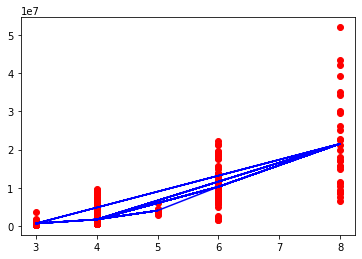

In [94]:
obj1 = PolyRegPredict(x,y)
obj1.plr_model()